In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  1. Загрузить данные из файла “insurance.csv”.

In [9]:
data = pd.read_csv('insurance.csv', sep=',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#  2. С помощью метода describe() посмотреть статистику по данным.
#  Сделать выводы.

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# 3. Построить гистограммы для числовых показателей

In [11]:
import seaborn as sns
import scipy.stats as sts
def show_histplot(col_name: str):
    fig, ax = plt.subplots()
    ax.set_title(col_name)
    sns.histplot(data[col_name], kde=True, color='b')

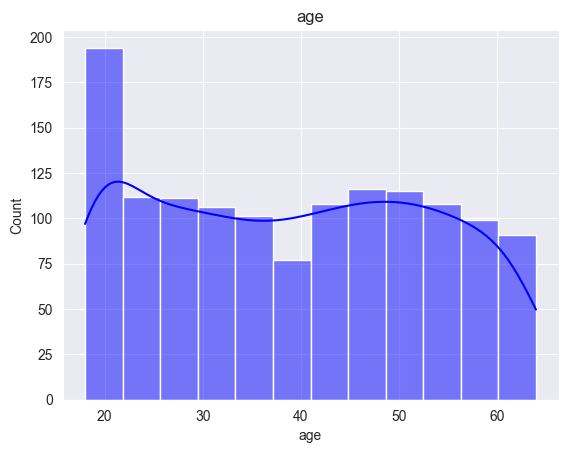

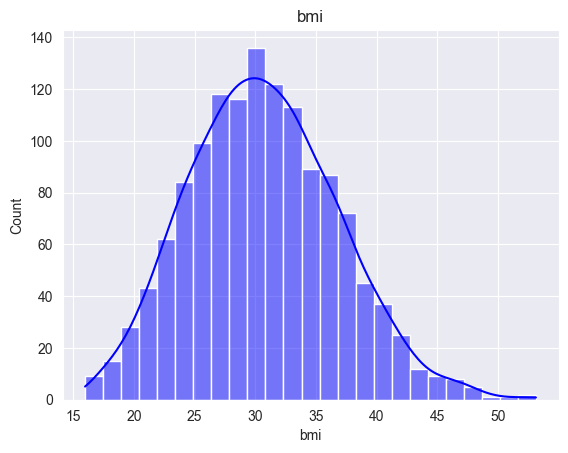

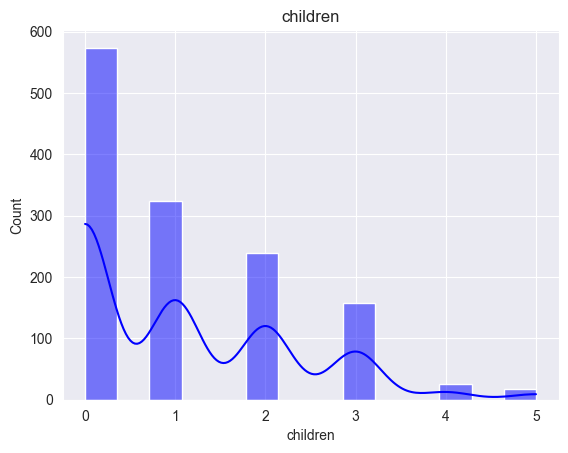

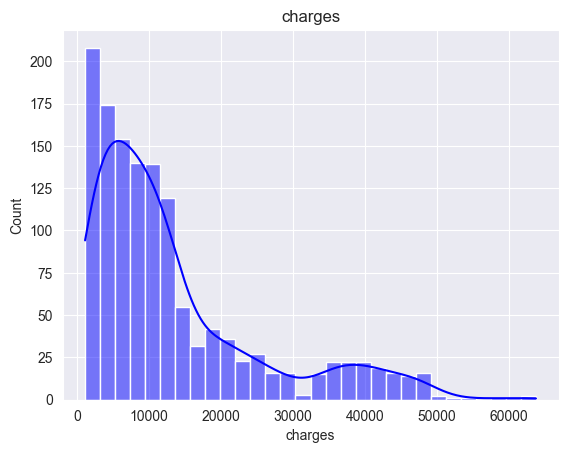

In [12]:
show_histplot('age')
show_histplot('bmi')
show_histplot('children')
show_histplot('charges')

#  4. Найти меры центральной тенденции и меры разброса для индекса массы
#  тела (bmi) и расходов (charges). Отобразить результаты в виде текста и
#  на гистограммах (3 вертикальные линии). Добавить легенду на графики.

In [17]:
def histplot_with_stat(col_name: str):
    st_mean = data[col_name].mean()
    st_moda = sts.mode(data[col_name], keepdims=True)
    st_med = np.median(data[col_name])
    std = data[col_name].std()
    raz = data[col_name].max() - data[col_name].min()
    iqr = sts.iqr(data[col_name], interpolation='midpoint')
    print('avg:', st_mean)
    print('moda:', st_moda)
    print('median:', st_med)
    print('стандартное отклонение:', std)
    print('размах:', raz)
    print('Межквартильный размах:', iqr)


    plt.axvline(st_mean, color='red')
    plt.axvline(st_moda.mode, color='green')
    plt.axvline(st_med, color='yellow')
    plt.legend(labels=["mean","moda","med"])

    sns.histplot(data[col_name], kde=True, color='b')

avg: 30.66339686098655
moda: ModeResult(mode=array([32.3]), count=array([13]))
median: 30.4
стандартное отклонение: 6.098186911679014
размах: 37.17
Межквартильный размах: 8.384999999999998


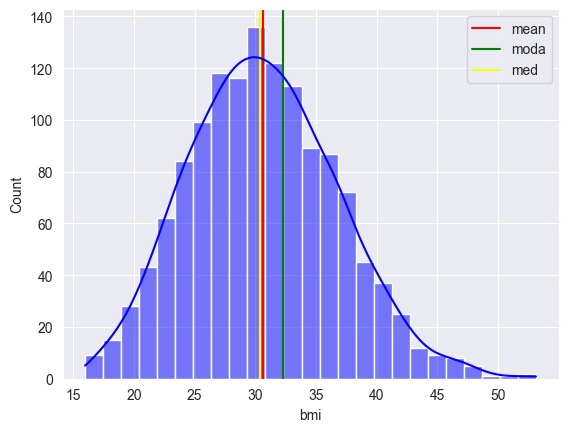

In [18]:
histplot_with_stat('bmi')

avg: 13270.422265141257
moda: ModeResult(mode=array([1639.5631]), count=array([2]))
median: 9382.033
стандартное отклонение: 12110.011236694001
размах: 62648.554110000005
Межквартильный размах: 11879.80148


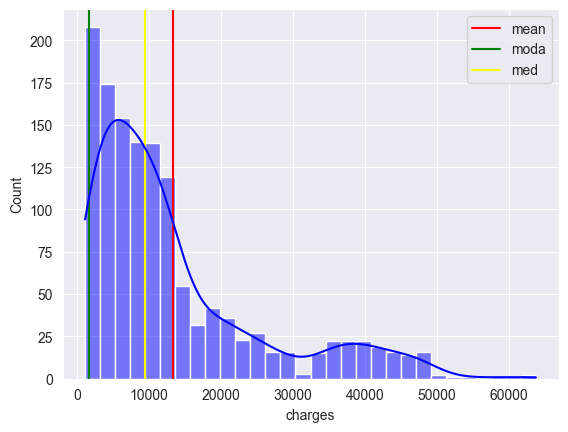

In [19]:
histplot_with_stat('charges')

# 5. Построить box-plot для числовых показателей. Названия графиков
# должны соответствовать названиям признаков. Сделать выводы.

In [20]:
import random
def boxplot_with_scat(col_name: str):
    fig, ax = plt.subplots()
    plt.boxplot(data[col_name], labels=[col_name], vert=False)
    plt.scatter(data[col_name], [random.random() + 0.5 for _ in range(data[col_name].size)], s=1.5)
    plt.grid()
    ax.set_title(col_name)

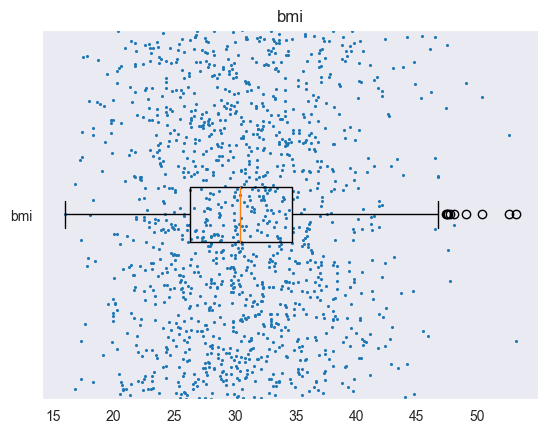

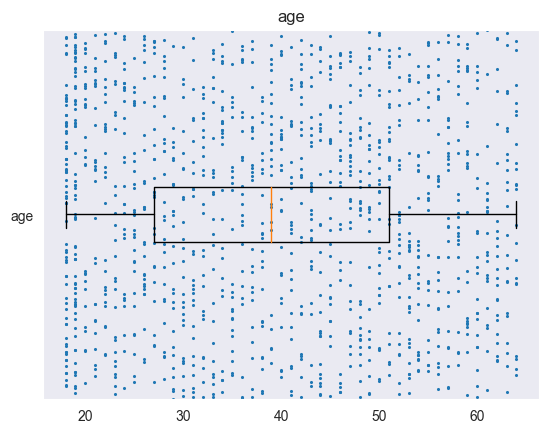

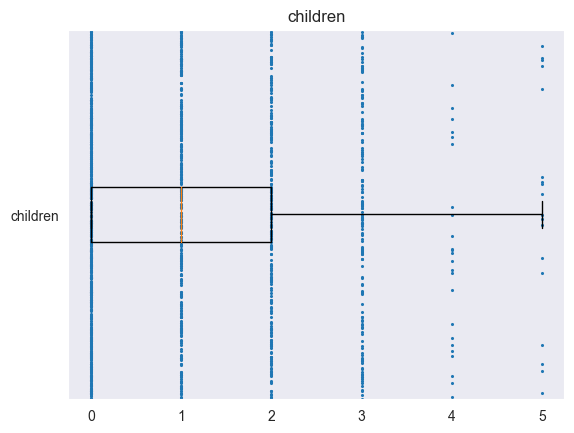

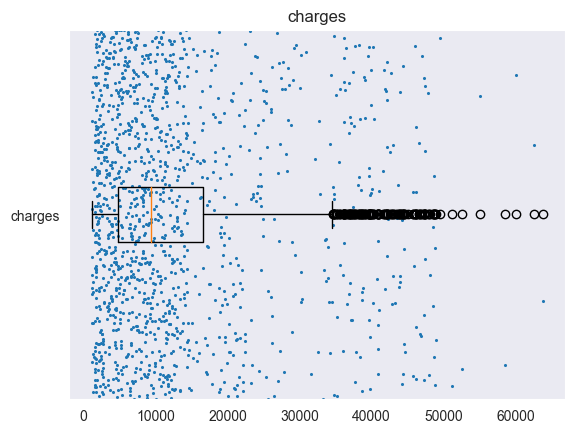

In [21]:
boxplot_with_scat('bmi')
boxplot_with_scat('age')
boxplot_with_scat('children')
boxplot_with_scat('charges')

# 6. Используя признак charges или bmi, проверить, выполняется ли
# центральная предельная теорема. Использовать различные длины
# выборок n. Количество выборок = 300. Вывести результат в виде
# гистограмм. Найти стандартное отклонение и среднее для полученных
# распределений. Сделать выводы.


In [22]:
def get_means(col_name: str):
    means = []
    ses = []
    ci_95 = []
    ci_99 = []
    for i in range(300):
        sample_size = random.randint(data[col_name].size // 10, data[col_name].size)
        data_sample = data.sample(n=sample_size)
        s_mean = data_sample[col_name].mean()
        means.append(s_mean)
        se = sts.sem(data_sample[col_name])
        ses.append(se)
        h_95 = se*sts.t.ppf((1+0.95)/2, sample_size)
        h_99 = se*2.58
        ci_95.append([s_mean - h_95, s_mean + h_95])
        ci_99.append([s_mean - h_99, s_mean + h_99])
    return pd.DataFrame({'mean': means, 'SE': ses, 'CI_95': ci_95, 'CI_99': ci_99})
means_df = get_means('charges')

In [23]:
def calc_means(col_name: str, sample_size: int, col_num: int):
    means = []
    cols = ['r','g', 'y', 'b']
    for _ in range(300):
        data_sample = data.sample(n=sample_size)
        s_mean = data_sample[col_name].mean()
        means.append(s_mean)
    ser_means = pd.Series(means)
    sns.histplot(ser_means, kde=True, color=cols[col_num])
    print('sample size:', sample_size)
    print('std:', ser_means.std())
    print('avg:', ser_means.mean())

sample size: 50
std: 1743.1236569058312
avg: 13156.159251643467
sample size: 100
std: 1210.7163018971623
avg: 13257.590382530068
sample size: 300
std: 621.7685885347436
avg: 13259.814685919268
sample size: 600
std: 357.0176321568042
avg: 13246.893003922089


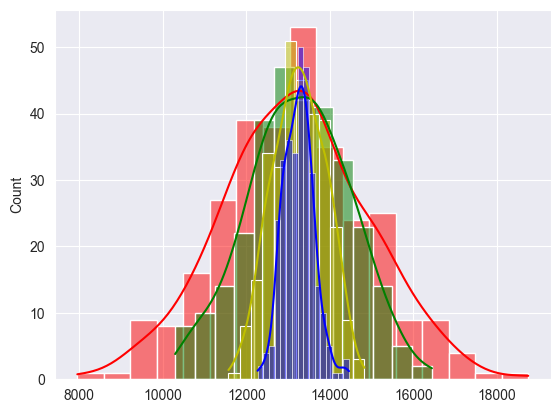

In [24]:
calc_means('charges', 50, 0)
calc_means('charges', 100, 1)
calc_means('charges', 300, 2)
calc_means('charges', 600, 3)

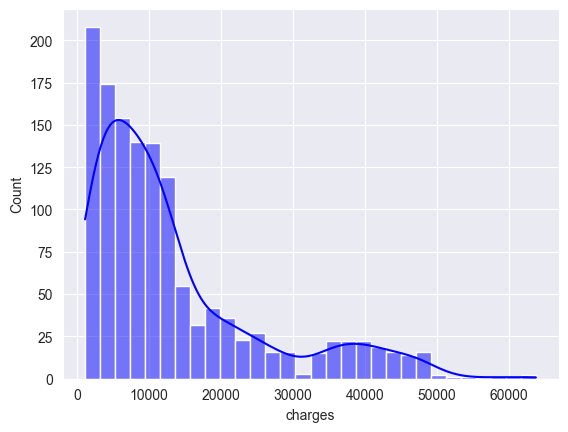

In [27]:
sns.histplot(data['charges'], kde=True, color='b');

стандартное отклонение: 382.6521660383989
avg for all data: 13270.422265141257
avg: 13296.447918386357


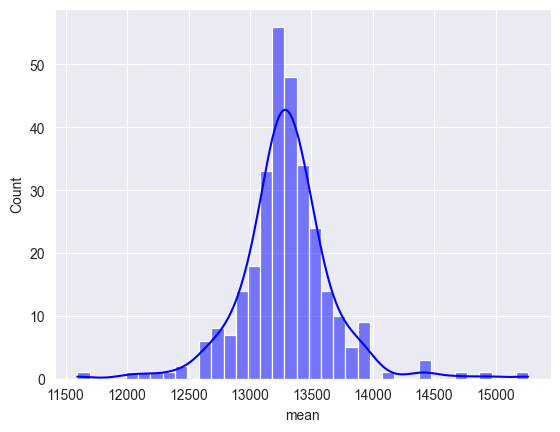

In [29]:
charges_means = means_df['mean']
sns.histplot(charges_means, kde=True, color='b')
print('стандартное отклонение:', charges_means.std())
print('avg for all data:', data['charges'].mean())
print('avg:', charges_means.mean())

# 7. Построить 95% и 99% доверительный интервал для среднего значения
# расходов и среднего значения индекса массы тела.

In [30]:
means_df

,mean,SE,CI_95,CI_99
0,13323.220860,335.493804,"[12665.059765461263, 13981.381954780378]","[12457.646844681638, 14188.794875560003]"
1,12905.304505,541.723875,"[11840.883483521367, 13969.7255269745]","[11507.656908337187, 14302.95210215868]"
2,13426.981106,379.672415,"[12681.968139329598, 14171.994072903544]","[12447.426276550086, 14406.535935683056]"
3,13122.034625,926.554311,"[11289.955504164418, 14954.113744966018]","[10731.524502977023, 15512.544746153413]"
4,13255.004227,366.183331,"[12536.498788487428, 13973.509666014408]","[12310.251233773912, 14199.757220727925]"
...,...,...,...,...
295,13400.916524,675.808249,"[12071.812620562258, 14730.020428364292]","[11657.331241699882, 15144.501807226668]"
296,13309.498172,384.596106,"[12554.787451072472, 14064.208892636652]","[12317.240218692297, 14301.756125016827]"
297,13283.311430,356.130617,"[12584.57729905549, 13982.045561202074]","[12364.494439502861, 14202.128420754703]"
298,13316.505867,574.263713,"[12188.032463325331, 14444.97927056714]","[11834.905486957046, 14798.106246935426]"


стандартное отклонение: 12110.011236694001
avg: 13270.422265141257
CI_95:  [12620.954474003627, 13919.890056278886]
CI_99:  [12416.268233006796, 14124.576297275717]


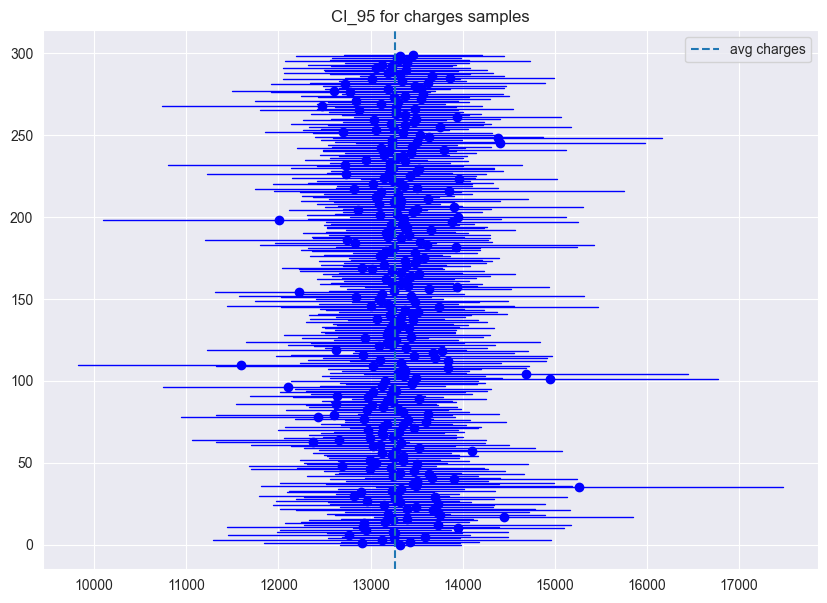

In [31]:
print('стандартное отклонение:', data['charges'].std())
avg = data['charges'].mean()
print('avg:', avg)
se = sts.sem(data['charges'])
h_95 = se*sts.t.ppf((1+0.95)/2, data['charges'].size)
h_99 = se*2.58
print('CI_95: ', [avg - h_95, avg + h_95])
print('CI_99: ', [avg - h_99, avg + h_99])
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title('CI_95 for charges samples')
for i, sample in enumerate(means_df.itertuples()):
    plt.plot((sample.CI_95[0], sample.CI_95[1]), (i, i), color='blue', linewidth=1)
    plt.plot(sample.mean, i, 'bo')

plt.axvline(x=data['charges'].mean(), ymin=0, ymax=1, linestyle='--', label = 'avg charges')
plt.legend(loc='best')

avg: 13270.422265141257
SE: 331.0674543156824
CI_95:  [12620.954474003627, 13919.890056278886]
CI_99:  [12416.430855543298, 14124.413674739215]


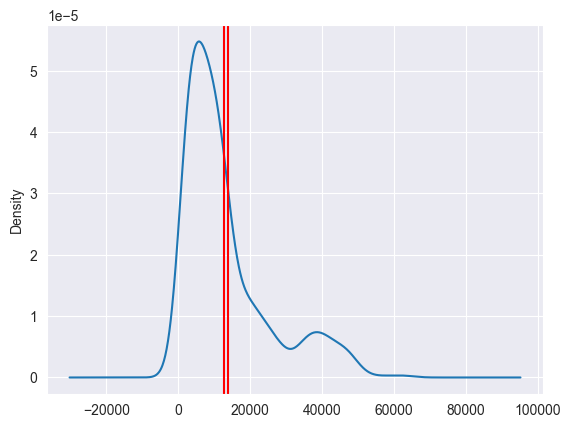

In [32]:
avg = data['charges'].mean()
print('avg:', avg)
se = sts.sem(data['charges'])
print('SE:', se)
h_95 = se*sts.t.ppf((1+0.95)/2, data['charges'].size)
h_99 = se*sts.t.ppf((1+0.99)/2, data['charges'].size)
print('CI_95: ', [avg - h_95, avg + h_95])
print('CI_99: ', [avg - h_99, avg + h_99])

data['charges'].plot.kde()

plt.axvline(avg - h_95, color='r')
plt.axvline(avg + h_95, color='r')

avg: 30.66339686098655
SE: 0.1667142315007415
CI_95:  [30.336347124527858, 30.99044659744524]
CI_99:  [30.233356034854474, 31.093437687118623]


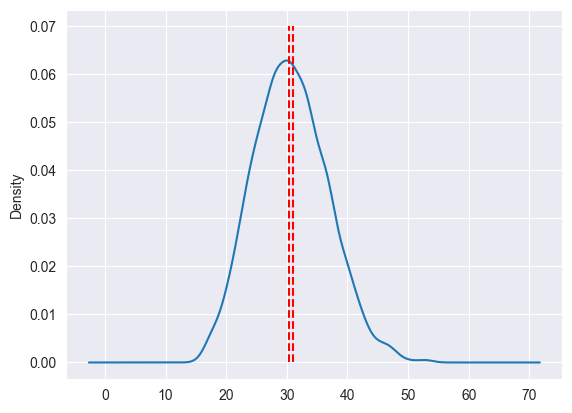

In [33]:
avg = data['bmi'].mean()
print('avg:', avg)
se = sts.sem(data['bmi'])
print('SE:', se)
h_95 = se*sts.t.ppf((1+0.95)/2, data['bmi'].size)
h_99 = se*sts.t.ppf((1+0.99)/2, data['bmi'].size)
print('CI_95: ', [avg - h_95, avg + h_95])
print('CI_99: ', [avg - h_99, avg + h_99])

data['bmi'].plot.kde(bw_method=0.2)

plt.vlines(avg - h_95, 0, 0.07, colors='r', linestyles='dashed')
plt.vlines(avg + h_95, 0, 0.07, colors='r', linestyles='dashed')

# 8. Проверить распределения следующих признаков на нормальность:
# индекс массы тела, расходы. Сформулировать нулевую и
# альтернативную гипотезы. Для каждого признака использовать KS-тест
# и q-q plot. Сделать выводы на основе полученных p-значений.

In [34]:
def test_ks(col_name: str):
    # d = data[col_name]
    sample_size = random.randint(data[col_name].size // 10, data[col_name].size)
    d = data.sample(n=sample_size)[col_name]
    s = np.random.normal(d.mean(), d.std(), d.size)
    ks_test = sts.kstest(d, s)
    print(ks_test)
    if ks_test.pvalue < 0.05:
        print('выборка не имеет нормального распределения')
    else:
        print('выборка имеет нормальное распределение')
    return ks_test

In [37]:
def qq_plot(col_name: str):
    sample_size = random.randint(data[col_name].size // 10, data[col_name].size)
    d = data.sample(n=sample_size)[col_name]
    s = np.random.normal(d.mean(), d.std(), d.size)
    percs = np.linspace(0,100)
    qn_a = np.percentile(d, percs)
    qn_b = np.percentile(s, percs)
    sns.histplot(d, kde=True, color='b')
    sns.histplot(s, kde=True, color='red')
    g = sns.jointplot(x=qn_b, y=qn_a,
                      kind='reg', truncate=True,
                      color='b', height=5, ratio=3,
                      scatter_kws={'s': 10,}, line_kws={'lw': 1, 'color': 'black'})

KstestResult(statistic=0.060897435897435896, pvalue=0.062142352632720076)
выборка имеет нормальное распределение


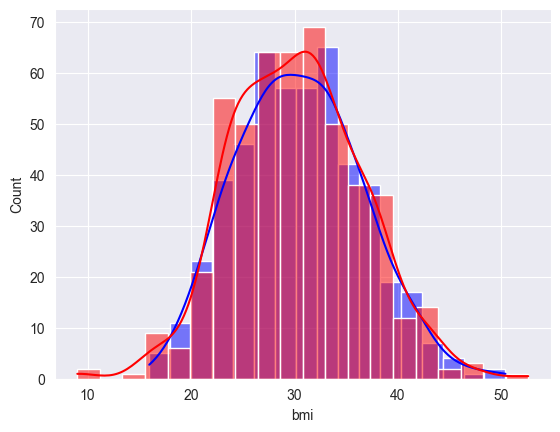

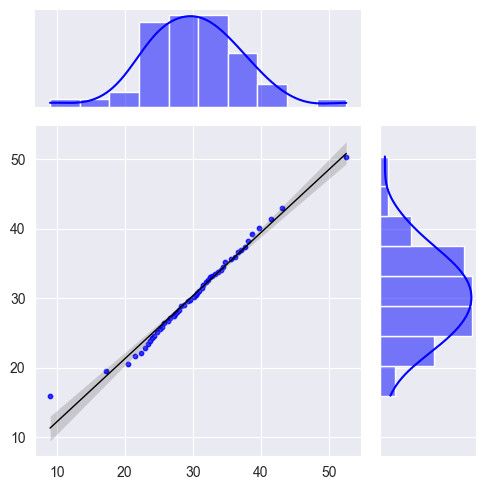

In [38]:
test_ks('bmi')
qq_plot('bmi')

KstestResult(statistic=0.18784029038112524, pvalue=2.096274816570419e-17)
выборка не имеет нормального распределения


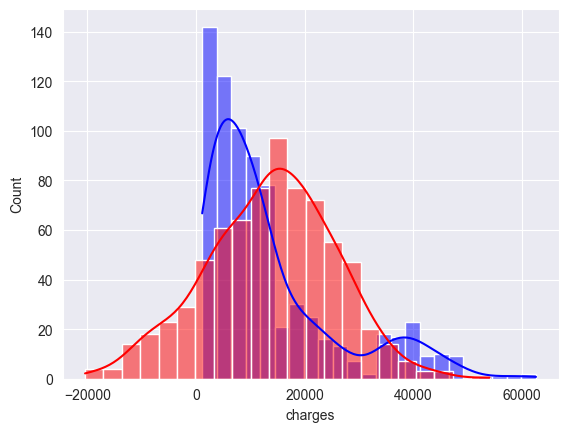

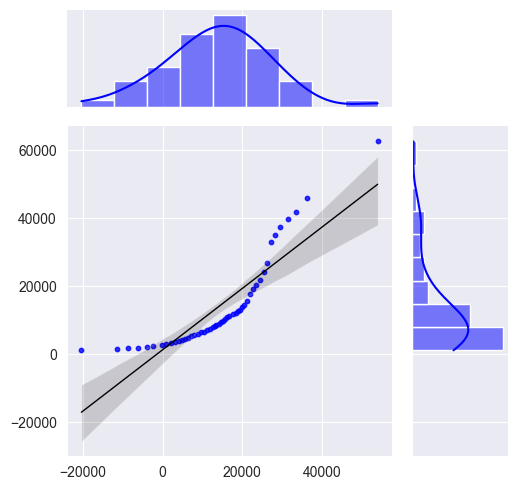

In [39]:
test_ks('charges')
qq_plot('charges')